In [1]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime

import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from market.market_data import MarketData
mkt = MarketData()

C:\Anaconda3\envs\finance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [2]:
from porfolio.portfolio import PortFolio

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [3]:
portfolio_assets = {
    'BTC': 0.007,
    'ETH': 2.14081,
    'XRP': 922.5,
    'ADA': 926,
    'XLM': 929.07,
    'LTC': 1.0,
    'TRX': 2760,
    'UBQ': 18.222,
    'BIS': 36.6,
    'IOTA': 47.553,
    'EMC2': 45,
    'FUN': 633.366,
    'ADST': 136.71
}

all_portfolio_assets = {
    'BTC': 0,
    'DASH': 0,
    'XMR': 0,
    'BCH': 0,
    'NEO': 0,
    'NEM': 0,
    'ETH': 0,
    'XRP': 0,
    'LTC': 0,
    'ADA': 0,
    'UBQ': 0,
    'BIS': 0,
    'IOTA': 0,
    'EMC2': 0,
    'TRX': 0,
    'FUN': 0,
    'XLM': 0
}

assets_effective_price = {
    'BTC': 0.1,
    'ETH': 454.96,
    'XRP': 0.772,
    'ADA': 0.404,
    'XLM': 0.378,
    'LTC': 208.23,
    'TRX': 0.0668,
    'UBQ': 5.7,
    'BIS': 3.48,
    'IOTA': 3.08,
    'EMC2': 0.769,
    'FUN': 0.0897,
    'ADST': 0.817   
}

In [4]:
import pylab as plt
import seaborn as sns
from pprint import pprint

sns.set()

myportfolio = PortFolio(
    name= 'PedroPortfolio'
    )

Loaded portfolio database from C:\projects\finances.git\finances\porfolio\PedroPortfolio\assets_allocation_data.csv


# Portfolio Comparison

In [5]:
myportfolio.assets_data

,ADA,ADST,BCH,BIS,BTC,DASH,EMC2,ETH,FUN,IOTA,LTC,NEO,TRX,UBQ,XLM,XMR,XRP
2018-01-01,926.000,136.71,0.0,36.600000,0.007000,0.000000,45.0,2.14081,633.366,47.553,1.0,0.00,2760.000,18.222000,929.07,0.00000,922.5
2018-02-06,0.073,136.71,0.0,36.592335,0.080743,0.286593,45.0,2.14081,2550.366,47.553,1.5,2.04,0.237,18.222222,279.07,1.32867,130.0


## Optimize the portfolio continuously

In [6]:
def apply_optimization(
    portfolio=PortFolio(),
    start_date = datetime.datetime(2017,11,3),
    end_date = datetime.datetime.now(),
    update_frequency = 7
    ):

    time_delta = datetime.timedelta(days=update_frequency)
    time = start_date
    value = 100

    portfolio.assets = all_portfolio_assets

    while time<end_date:
        optimal_df = portfolio.optimize_allocation(
            target_return=0.1,
            projection_steps=update_frequency,
            date=time,
            value_to_invest=value)
        
        optimal_assets = optimal_df['coin_quantities'].to_dict()
        portfolio.insert_assets_at_date(assets=optimal_assets, date=time)
        
        time+=time_delta
        portfolio.update_data()
        value=portfolio.values_data.loc[:time]['TOTAL'].iloc[-1]
    return portfolio

optimized_pfl=apply_optimization()

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


### optimize only at the beginning

In [7]:
start_date = datetime.datetime(2017,11,3)
optimized_once_pfl = PortFolio()
optimized_once_pfl.assets = all_portfolio_assets

optimal_df = optimized_once_pfl.optimize_allocation(target_return=0.25, projection_steps=100, date=start_date, value_to_invest=100)
optimal_assets = optimal_df['coin_quantities'].to_dict()
optimized_once_pfl.insert_assets_at_date(assets=optimal_assets, date=start_date)

,BTC,ETH,LTC,XRP
2017-11-03,0.006461,0.096979,0.452203,71.815163


### real one

In [8]:
myportfolio.insert_assets_at_date(assets=portfolio_assets, date=start_date)
myportfolio.update_data()

### compare

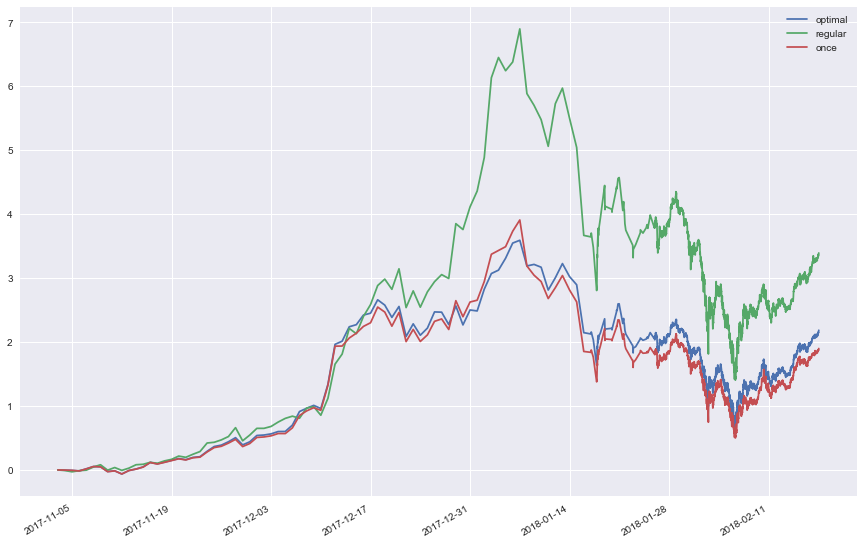

In [9]:
fig = plt.figure(figsize=(15,10))

optimized_pfl.relative_variation_since(start_date=start_date)['TOTAL'].plot(label='optimal')
myportfolio.relative_variation_since(start_date=start_date)['TOTAL'].plot(label='regular')
optimized_once_pfl.relative_variation_since(start_date=start_date)['TOTAL'].plot(label='once')
plt.legend()

In [10]:
print(optimized_pfl.relative_variation_since(start_date=start_date)['TOTAL'].iloc[-1])
print(myportfolio.relative_variation_since(start_date=start_date)['TOTAL'].iloc[-1])
print(optimized_once_pfl.relative_variation_since(start_date=start_date)['TOTAL'].iloc[-1])

2.18563445828
3.39453695337
1.89984722993


# Apply for random periods

In [11]:
import random
fullrets = mkt.crypto_returns_data(
    symbols=list(all_portfolio_assets.keys())
    ).dropna()

time_delta_stress_test=datetime.timedelta(days=60)

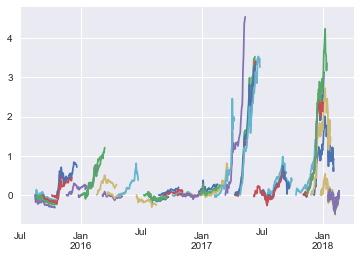

In [12]:
return_sample=[]
for k in range(50):
    start_test = random.choice(fullrets.index)
    end_test=start_test+time_delta_stress_test
    a=apply_optimization(
        portfolio=PortFolio(),
        start_date = start_test,
        end_date=end_test,
        update_frequency = 14
        )
    a.relative_variation_since(start_date=start_test)['TOTAL'].loc[:end_test].plot()
    return_sample.append(a.relative_variation_since(start_date=start_test)['TOTAL'].loc[:end_test].iloc[-1])

{'boxes': [<matplotlib.lines.Line2D at 0x1a52fc942b0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a52fc94dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a52fc9abe0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a52fc9a748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a52fc94438>,
  <matplotlib.lines.Line2D at 0x1a52fc94940>]}

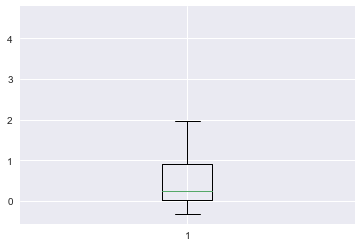

In [13]:
plt.boxplot(return_sample)